In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load Dataset
# Load Dataset from Google Drive
file_path = "/content/drive/My Drive/AQI DATASET/delhi_aqi.csv"  # Update with correct path
df = pd.read_csv(file_path)

In [ ]:
# Display basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Checking missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
None
                 co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000      0.000000      4.280000      0.000000      5.250000   
25%     1068.120000      0.680000

In [ ]:
# Handle missing values
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Fill numeric missing values with median

In [ ]:
# Convert Date column to datetime if available
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

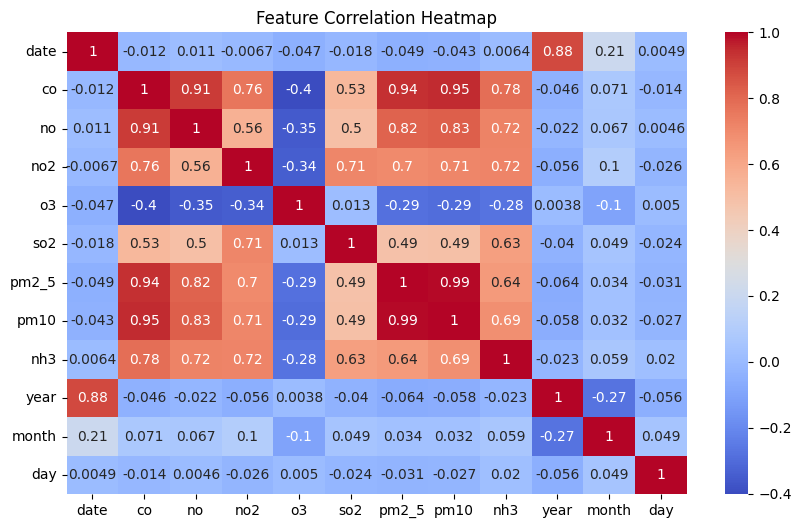

In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Selecting Features and Target (Assuming PM2.5 is the target variable)
features = df.drop(columns=['pm2_5', 'date'])  # Drop non-relevant columns
target = df['pm2_5']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [ ]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:
import joblib

# Save the model
joblib.dump(model, "air_quality_model.pkl")
joblib.dump(scaler, "scaler.pkl")

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# **Model Accuracy**

In [ ]:
from sklearn.metrics import r2_score

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy_percent = r2 * 100  # Convert R² to percentage

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Model Accuracy (R² Score): {accuracy_percent:.2f}%")


# Actual VS Predicted

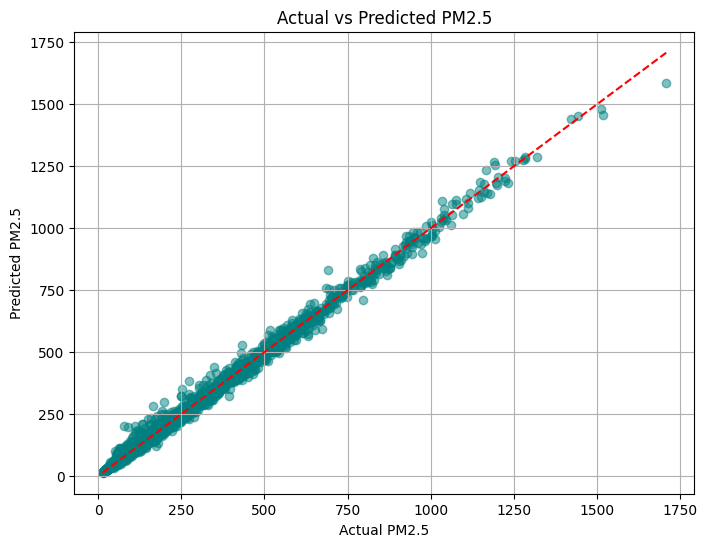

In [ ]:
# 1. Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5")
plt.grid(True)
plt.show()




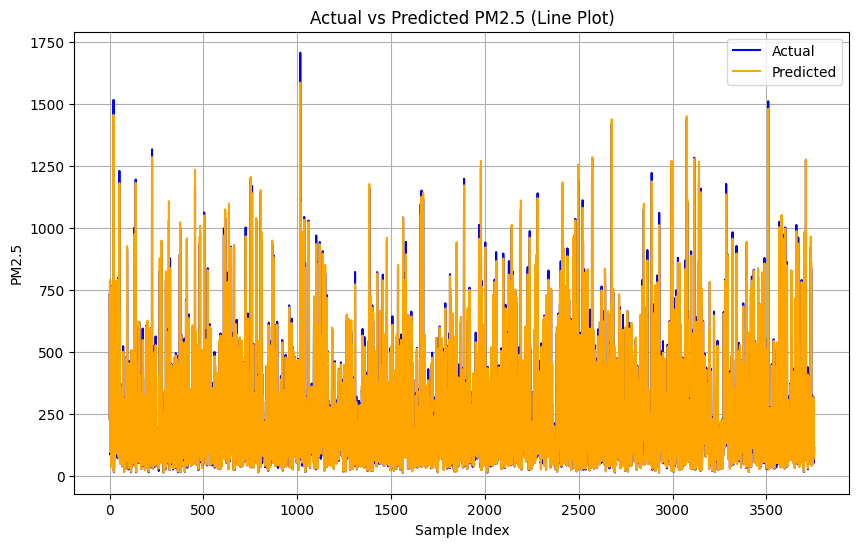

In [ ]:
# 2. Line Plot: Comparison over samples
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_df = comparison_df.reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.plot(comparison_df['Actual'], label='Actual', color='blue')
plt.plot(comparison_df['Predicted'], label='Predicted', color='orange')
plt.title("Actual vs Predicted PM2.5 (Line Plot)")
plt.xlabel("Sample Index")
plt.ylabel("PM2.5")
plt.legend()
plt.grid(True)
plt.show()


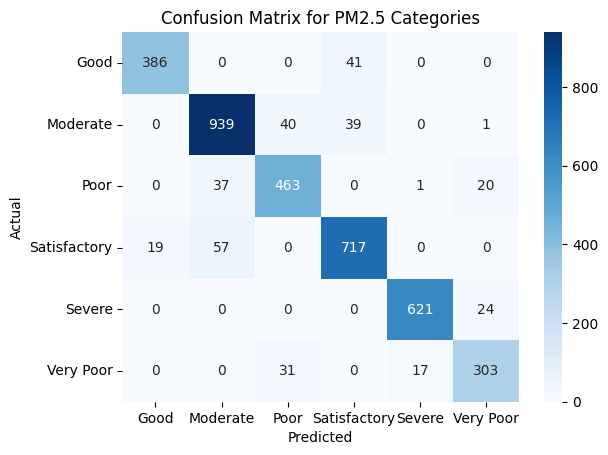

              precision    recall  f1-score   support

        Good       0.95      0.90      0.93       427
    Moderate       0.91      0.92      0.92      1019
        Poor       0.87      0.89      0.88       521
Satisfactory       0.90      0.90      0.90       793
      Severe       0.97      0.96      0.97       645
   Very Poor       0.87      0.86      0.87       351

    accuracy                           0.91      3756
   macro avg       0.91      0.91      0.91      3756
weighted avg       0.91      0.91      0.91      3756



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define a function to categorize PM2.5 levels
def categorize_pm25(pm):
    if pm <= 50:
        return 'Good'
    elif pm <= 100:
        return 'Satisfactory'
    elif pm <= 200:
        return 'Moderate'
    elif pm <= 300:
        return 'Poor'
    elif pm <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# Apply categorization
df['pm2_5_category'] = df['pm2_5'].apply(categorize_pm25)

# Drop unused columns
X = df.drop(columns=['pm2_5', 'pm2_5_category', 'date'])
y = df['pm2_5_category']

# Encode categorical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for PM2.5 Categories")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))


# Year wise confusion matrix


=== Year: 2020 ===

=== Year: 2021 ===

=== Year: 2022 ===

=== Year: 2023 ===

=== Year: 2020 ===


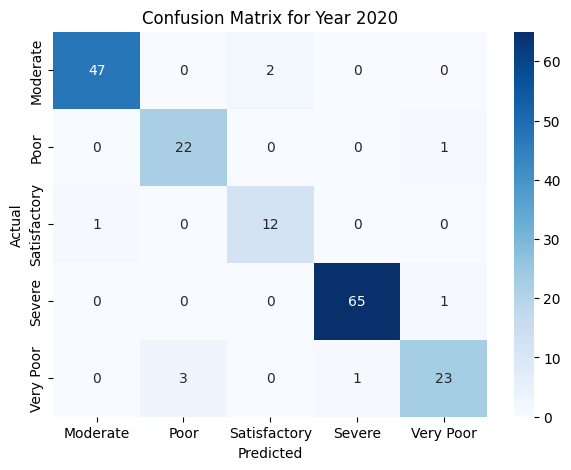

              precision    recall  f1-score   support

    Moderate       0.98      0.96      0.97        49
        Poor       0.88      0.96      0.92        23
Satisfactory       0.86      0.92      0.89        13
      Severe       0.98      0.98      0.98        66
   Very Poor       0.92      0.85      0.88        27

    accuracy                           0.95       178
   macro avg       0.92      0.94      0.93       178
weighted avg       0.95      0.95      0.95       178


=== Year: 2021 ===


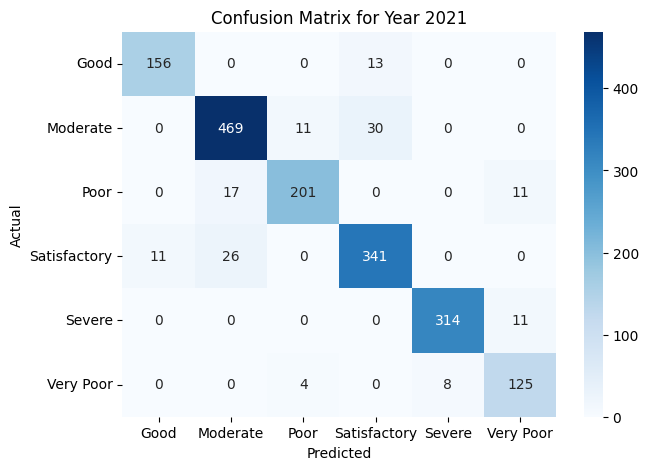

              precision    recall  f1-score   support

        Good       0.93      0.92      0.93       169
    Moderate       0.92      0.92      0.92       510
        Poor       0.93      0.88      0.90       229
Satisfactory       0.89      0.90      0.90       378
      Severe       0.98      0.97      0.97       325
   Very Poor       0.85      0.91      0.88       137

    accuracy                           0.92      1748
   macro avg       0.92      0.92      0.92      1748
weighted avg       0.92      0.92      0.92      1748


=== Year: 2022 ===


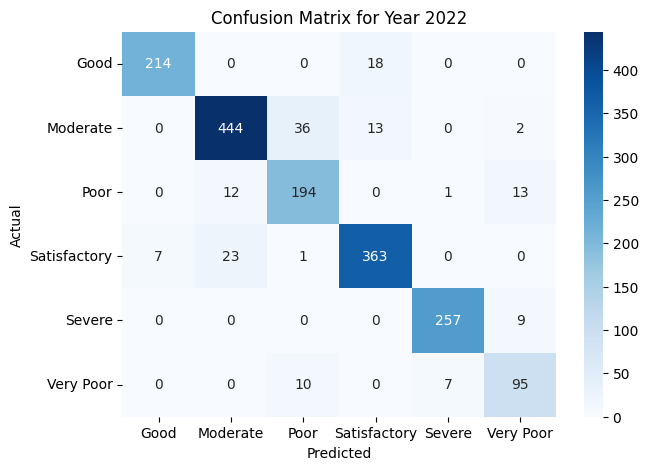

              precision    recall  f1-score   support

        Good       0.97      0.92      0.94       232
    Moderate       0.93      0.90      0.91       495
        Poor       0.80      0.88      0.84       220
Satisfactory       0.92      0.92      0.92       394
      Severe       0.97      0.97      0.97       266
   Very Poor       0.80      0.85      0.82       112

    accuracy                           0.91      1719
   macro avg       0.90      0.91      0.90      1719
weighted avg       0.91      0.91      0.91      1719


=== Year: 2023 ===


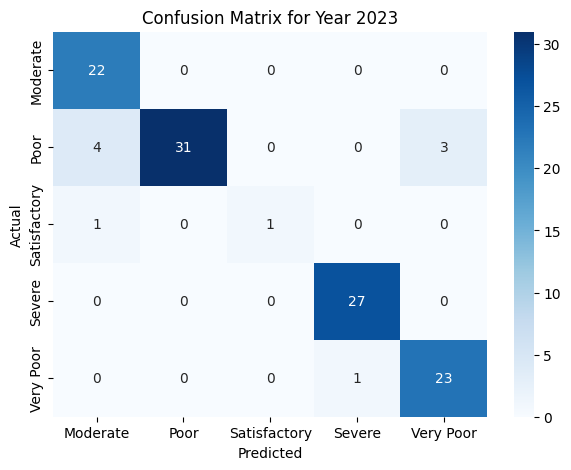

              precision    recall  f1-score   support

    Moderate       0.81      1.00      0.90        22
        Poor       1.00      0.82      0.90        38
Satisfactory       1.00      0.50      0.67         2
      Severe       0.96      1.00      0.98        27
   Very Poor       0.88      0.96      0.92        24

    accuracy                           0.92       113
   macro avg       0.93      0.85      0.87       113
weighted avg       0.93      0.92      0.92       113



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Function to categorize PM2.5
def categorize_pm25(pm):
    if pm <= 50:
        return 'Good'
    elif pm <= 100:
        return 'Satisfactory'
    elif pm <= 200:
        return 'Moderate'
    elif pm <= 300:
        return 'Poor'
    elif pm <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# Apply categorization
df['pm2_5_category'] = df['pm2_5'].apply(categorize_pm25)

# Encode target labels once
le = LabelEncoder()
df['pm2_5_category_encoded'] = le.fit_transform(df['pm2_5_category'])

# Get list of years available
years = df['year'].unique()

# Loop over each year
for year in sorted(years):
    print(f"\n=== Year: {year} ===")
    df_year = df[df['year'] == year]

    # Features and target
    X = df_year.drop(columns=['pm2_5', 'pm2_5_category', 'pm2_5_category_encoded', 'date'])
    y = df_year['pm2_5_category_encoded']

# Get list of years available
years = df['year'].unique()

# Loop over each year
for year in sorted(years):
    print(f"\n=== Year: {year} ===")
    df_year = df[df['year'] == year]

    # Features and target
    X = df_year.drop(columns=['pm2_5', 'pm2_5_category', 'pm2_5_category_encoded', 'date'])
    y = df_year['pm2_5_category']  # Use original category labels


# Check if data is sufficient
    if len(df_year) < 50 or len(np.unique(y)) < 2:
        print("  Not enough data or classes for this year to build a valid model.")
        continue

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_scaled, y_train)

    # Predict
    y_pred = clf.predict(X_test_scaled)

    le = LabelEncoder()
    le.fit(y_train)  # Fit only on training data for this year

    # Using the refitted LabelEncoder to get correct classes
    cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for Year {year}")
    plt.show()

    print(classification_report(y_test, y_pred, target_names=le.classes_))


# For Future prediction

<ipython-input-27-b1ffd0e8716f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['pm2_5_category'] = train_df['pm2_5'].apply(categorize_pm25)
<ipython-input-27-b1ffd0e8716f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df['pm2_5_category'] = future_df['pm2_5'].apply(categorize_pm25)
<ipython-input-27-b1ffd0e8716f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 


✅ Prediction Accuracy for Year 2023: 90.55%


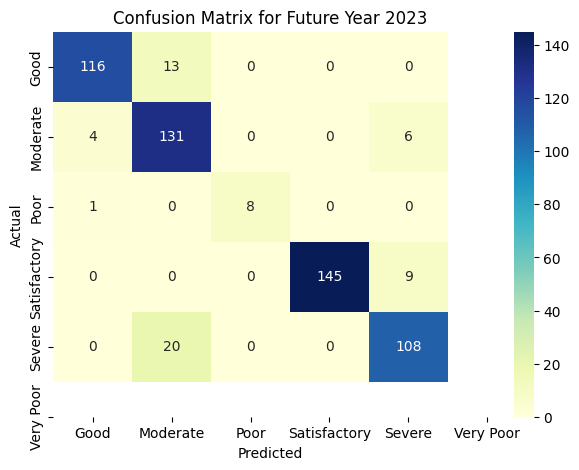

              precision    recall  f1-score   support

    Moderate       0.96      0.90      0.93       129
        Poor       0.80      0.93      0.86       141
Satisfactory       1.00      0.89      0.94         9
      Severe       1.00      0.94      0.97       154
   Very Poor       0.88      0.84      0.86       128

    accuracy                           0.91       561
   macro avg       0.93      0.90      0.91       561
weighted avg       0.91      0.91      0.91       561



In [ ]:
# 1. Train model on all years except the last one
latest_year = df['year'].max()
train_df = df[df['year'] < latest_year]
future_df = df[df['year'] == latest_year]

# Ensure 'pm2_5_category' exists
train_df['pm2_5_category'] = train_df['pm2_5'].apply(categorize_pm25)
future_df['pm2_5_category'] = future_df['pm2_5'].apply(categorize_pm25)

# Encode labels
train_df['pm2_5_category_encoded'] = le.fit_transform(train_df['pm2_5_category'])
future_df['pm2_5_category_encoded'] = le.transform(future_df['pm2_5_category'])

# Split features and target
X_train = train_df.drop(columns=['pm2_5', 'pm2_5_category', 'pm2_5_category_encoded', 'date'])
y_train = train_df['pm2_5_category_encoded']

X_future = future_df.drop(columns=['pm2_5', 'pm2_5_category', 'pm2_5_category_encoded', 'date'])
y_future = future_df['pm2_5_category_encoded']

# Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_future_scaled = scaler.transform(X_future)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on future year
y_pred_future = clf.predict(X_future_scaled)

# Accuracy
from sklearn.metrics import accuracy_score
future_accuracy = accuracy_score(y_future, y_pred_future)
print(f"\n✅ Prediction Accuracy for Year {latest_year}: {future_accuracy * 100:.2f}%")

# Confusion matrix for future prediction
cm = confusion_matrix(y_future, y_pred_future)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='YlGnBu')
plt.title(f"Confusion Matrix for Future Year {latest_year}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
# Get the unique classes present in y_future
unique_classes_future = np.unique(y_future)

# Filter le.classes_ to include only the classes present in y_future
target_names_future = [
    class_name
    for class_index, class_name in enumerate(le.classes_)
    if class_index in unique_classes_future
]

print(classification_report(y_future, y_pred_future, target_names=target_names_future))

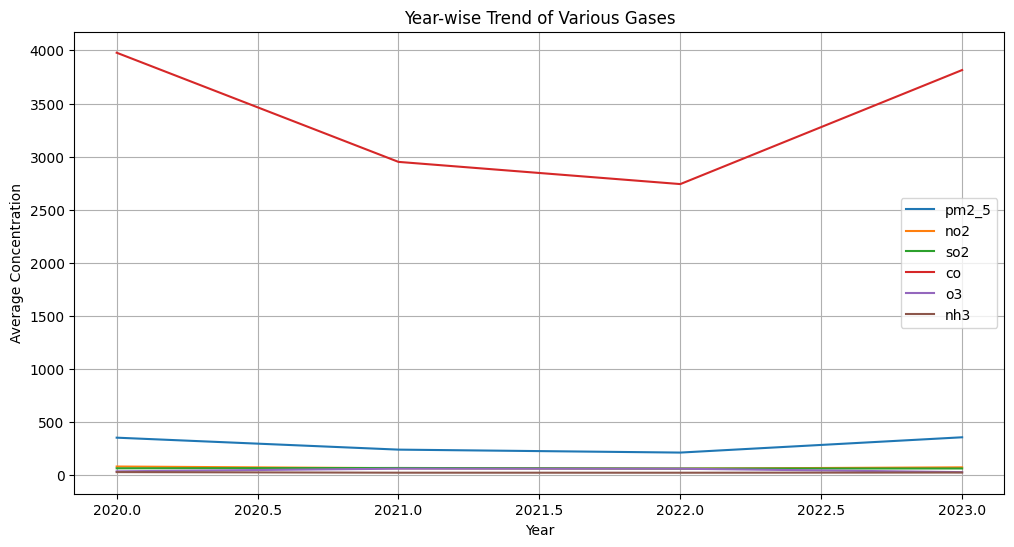

In [ ]:
# Mean concentration of pollutants by year
gases = ['pm2_5', 'no2', 'so2', 'co', 'o3', 'nh3']  # Modify as per actual columns
gas_means = df.groupby('year')[gases].mean()

plt.figure(figsize=(12, 6))
for gas in gases:
    plt.plot(gas_means.index, gas_means[gas], label=gas)
plt.title("Year-wise Trend of Various Gases")
plt.xlabel("Year")
plt.ylabel("Average Concentration")
plt.legend()
plt.grid(True)
plt.show()


# **For 2025 dataset if exist**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Step 1: Categorization function
# ---------------------------
def categorize_pm25(pm):
    if pm <= 50:
        return 'Good'
    elif pm <= 100:
        return 'Satisfactory'
    elif pm <= 200:
        return 'Moderate'
    elif pm <= 300:
        return 'Poor'
    elif pm <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# ---------------------------
# Step 2: Apply categorization
# ---------------------------
df['pm2_5_category'] = df['pm2_5'].apply(categorize_pm25)

# ---------------------------
# Step 3: Filter training data (before 2025) and test data (2025)
# ---------------------------
future_year = 2025
train_df = df[df['year'] < future_year].copy()
future_df = df[df['year'] == future_year].copy()

# Check if 2025 data exists
if future_df.empty:
    print("❌ No data found for the year 2025.")
else:
    # ---------------------------
    # Step 4: Encode labels
    # ---------------------------
    le = LabelEncoder()
    train_df['pm2_5_category_encoded'] = le.fit_transform(train_df['pm2_5_category'])
    future_df['pm2_5_category_encoded'] = le.transform(future_df['pm2_5_category'])

    # ---------------------------
    # Step 5: Prepare features and target
    # ---------------------------
    drop_cols = ['pm2_5', 'pm2_5_category', 'pm2_5_category_encoded', 'date']
    X_train = train_df.drop(columns=[col for col in drop_cols if col in train_df.columns])
    y_train = train_df['pm2_5_category_encoded']

    X_future = future_df.drop(columns=[col for col in drop_cols if col in future_df.columns])
    y_future = future_df['pm2_5_category_encoded']

    # ---------------------------
    # Step 6: Standard Scaling
    # ---------------------------
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_future_scaled = scaler.transform(X_future)

    # ---------------------------
    # Step 7: Train model
    # ---------------------------
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_scaled, y_train)

    # ---------------------------
    # Step 8: Predict
    # ---------------------------
    y_pred_future = clf.predict(X_future_scaled)

    # ---------------------------
    # Step 9: Accuracy
    # ---------------------------
    accuracy = accuracy_score(y_future, y_pred_future)
    print(f"\n✅ Prediction Accuracy for Year {future_year}: {accuracy * 100:.2f}%")

    # ---------------------------
    # Step 10: Confusion Matrix
    # ---------------------------
    cm = confusion_matrix(y_future, y_pred_future)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix for Year {future_year}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ---------------------------
    # Step 11: Classification Report
    # ---------------------------
    unique_classes = np.unique(y_future)
    target_names = [le.classes_[i] for i in unique_classes]
    print(classification_report(y_future, y_pred_future, target_names=target_names))


❌ No data found for the year 2025.
